# **Artificial Neural Networks (ANN) Model**

# Importing Necessary Dependencies


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping


# Load the dataset

In [10]:
# Step 1: Load data
X_train = pd.read_parquet('../data/processed/X_train.parquet')
X_test = pd.read_parquet('../data/processed/X_test.parquet')
y_train = pd.read_parquet('../data/processed/y_train.parquet').squeeze()
y_test = pd.read_parquet('../data/processed/y_test.parquet').squeeze()

# Drop non-numeric columns

In [11]:
# Step 2: Drop non-numeric columns
X_train_numeric = X_train.select_dtypes(include=[np.number])
X_test_numeric = X_test.select_dtypes(include=[np.number])


# Encode Data

In [12]:
# Step 3: Encode target
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

# One-hot encoding for categorical targets
y_train_cat = to_categorical(y_train_enc)
y_test_cat = to_categorical(y_test_enc)

# Scale numeric features

In [13]:
# Step 4: Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

# Build ANN

In [14]:
# Step 5: Build ANN
model = Sequential()
model.add(Input(shape=(X_train_scaled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(y_train_cat.shape[1], activation='softmax'))

# Compile model

In [15]:
# Step 6: Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model with early stopping

In [16]:
# Step 7: Train model with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    X_train_scaled,
    y_train_cat,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
5172/5172 ━━━━━━━━━━━━━━━━━━━━ 4s 764us/step - accuracy: 0.7974 - loss: 0.4439 - val_accuracy: 0.8187 - val_loss: 0.4023
Epoch 2/50
5172/5172 ━━━━━━━━━━━━━━━━━━━━ 4s 683us/step - accuracy: 0.8164 - loss: 0.4082 - val_accuracy: 0.8198 - val_loss: 0.3984
Epoch 3/50
5172/5172 ━━━━━━━━━━━━━━━━━━━━ 4s 732us/step - accuracy: 0.8168 - loss: 0.4060 - val_accuracy: 0.8209 - val_loss: 0.3970
Epoch 4/50
5172/5172 ━━━━━━━━━━━━━━━━━━━━ 4s 738us/step - accuracy: 0.8195 - loss: 0.4023 - val_accuracy: 0.8223 - val_loss: 0.3946
Epoch 5/50
5172/5172 ━━━━━━━━━━━━━━━━━━━━ 4s 704us/step - accuracy: 0.8192 - loss: 0.4013 - val_accuracy: 0.8223 - val_loss: 0.3952
Epoch 6/50
5172/5172 ━━━━━━━━━━━━━━━━━━━━ 4s 705us/step - accuracy: 0.8213 - loss: 0.3988 - val_accuracy: 0.8236 - val_loss: 0.3946
Epoch 7/50
5172/5172 ━━━━━━━━━━━━━━━━━━━━ 4s 783us/step - accuracy: 0.8211 - loss: 0.3981 - val_accuracy: 0.8248 - val_loss: 0.3940
Epoch 8/50
5172/5172 ━━━━━━━━━━━━━━━━━━━━ 4s 734us/step - accuracy: 0.8225 -

# Predict on test set

In [17]:
# Step 8: Predict on test set
y_pred_probs = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

1617/1617 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step


# Classification report

In [18]:
# Step 9: Classification report
print(classification_report(y_test_enc, y_pred_classes, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

         bad       0.83      0.85      0.84     28577
        good       0.81      0.79      0.80     23143

    accuracy                           0.82     51720
   macro avg       0.82      0.82      0.82     51720
weighted avg       0.82      0.82      0.82     51720



# Plot learning curve

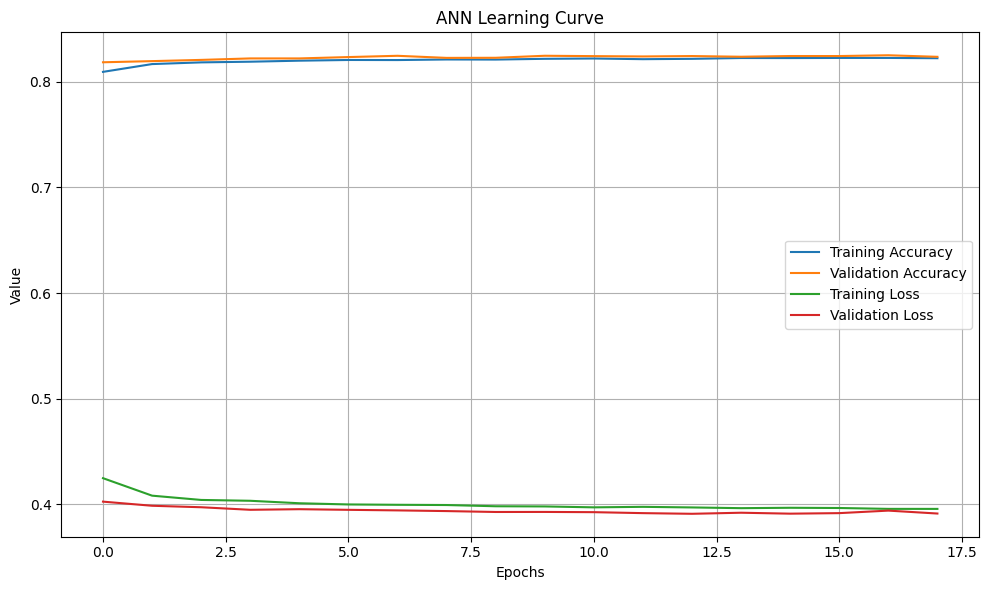

In [19]:
# Step 10: Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('ANN Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
